## **Esta es una version en phyton, lo primero que realice fue instalar la libreria de "scikit fuzzy", para la logica difusa**

In [24]:
!pip install scikit-fuzzy

# **Importacion**

In [39]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# **Cree** las variables de entrada y salida difusas

In [40]:
temperatura = ctrl.Antecedent(np.arange(0, 101, 1), 'temperatura')
potencia_aire = ctrl.Consequent(np.arange(0, 101, 1), 'potencia_aire')

# Definí las funciones de las temperaturas **para** las variables de entrada y salida

In [53]:
temperatura['Frio'] = fuzz.trimf(temperatura.universe, [-10, 0, 10])
temperatura['Normal'] = fuzz.trimf(temperatura.universe, [15, 20, 25])
temperatura['Calido'] = fuzz.trimf(temperatura.universe, [30, 35, 40])

In [59]:
potencia_aire['Baja'] = fuzz.trimf(potencia_aire.universe, [0, 0, 50])
potencia_aire['Regular'] = fuzz.trimf(potencia_aire.universe, [0, 50, 100])
potencia_aire['Alta'] = fuzz.trimf(potencia_aire.universe, [50, 100, 100])

# Visualización de las funciones de las **temperaturas**

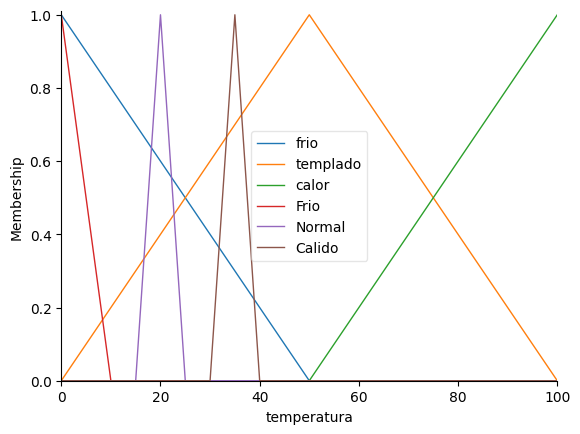

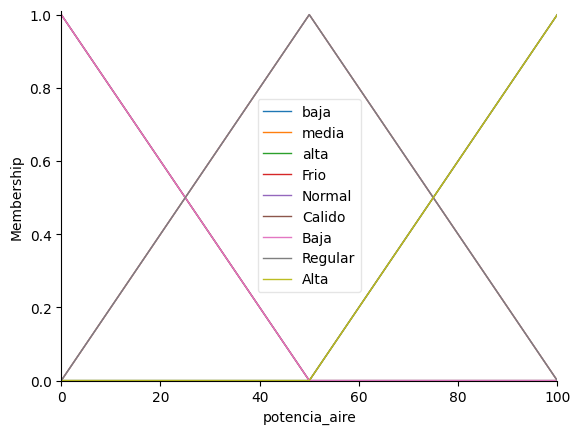

In [60]:
temperatura.view()
potencia_aire.view()

# Reglas **difusas**

In [84]:
regla1 = ctrl.Rule(temperatura['frio'], potencia_aire['alta'])
regla2 = ctrl.Rule(temperatura['templado'], potencia_aire['media'])
regla3 = ctrl.Rule(temperatura['calor'], potencia_aire['baja'])

Control del sistema difuso

In [85]:
sistema_ctrl = ctrl.ControlSystem([regla1, regla2, regla3])
sistema = ctrl.ControlSystemSimulation(sistema_ctrl)

# Simular el sistema con ciertos valores de **temperatura**

In [89]:
sistema.input['temperatura'] = 63

# Resultado **adquirido**

In [90]:
sistema.compute()


# Valor de **salida**

In [91]:
print("Potencia del aire acondicionado:", sistema.output['potencia_aire'])

Potencia del aire acondicionado: 48.40247015800737


# Visualizar el **resultado**

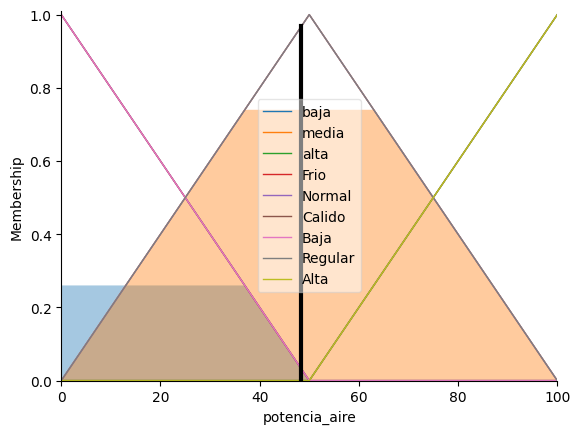

In [92]:
potencia_aire.view(sim=sistema)